## The Unfair Coin

When flipped a total of 50 times, a one-peso coin came up heads 28 times and tails 22 times. Does this data give evidence that the coin is more biased towards heads than tails?


In [1]:
### IMPORTS

%matplotlib inline
from scipy.stats import norm
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np
import math

#set font size of plots to 22
matplotlib.rcParams.update({"font.size":22})

In [2]:
HEADS = 1
TAILS = 0

In [3]:
def initPriors(hypothesis):
    pH = []
    
    # get pH
    for h in hypothesis:
        pH.append(1/len(hypothesis))
    return pH     # set each prior to a uniform value

In [4]:
def likelihood(data, hypothesis):
    pDH = []
    for h in hypothesis:
        if(data == HEADS):
            pDH.append(h/100)
        else:
            pDH.append(1-h/100)
    return pDH

In [5]:
def update(hypo, prior, data):
    # for each hypothesis, calculate P(H) * P(D|H), or the prior times the likelihood
    
    # get pHpDH
    pHpDH = []
    pDH = likelihood(data, hypo)
    pSum = 0
    for i in range(0,len(hypo)):
        pHpDH.append(prior[i] * pDH[i])
        pSum = pSum + pHpDH[i]
        
    posterior = []
    for i in range(0,len(hypo)):
        if(pSum == 0):
            posterior.append(0)
        else:
            posterior.append(pHpDH[i]/pSum)
        
    return posterior

In [6]:
def percentile(prior, hypothesis, percent):
    p = percent / 100
    
    total = 0
    
    for i in range(len(hypothesis)):
        total += prior[i]
        if (total >= p):
            return hypothesis[i]

[1.0, 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.9299999999999999, 0.92, 0.91, 0.9, 0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.8200000000000001, 0.81, 0.8, 0.79, 0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7, 0.69, 0.6799999999999999, 0.6699999999999999, 0.6599999999999999, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6, 0.5900000000000001, 0.5800000000000001, 0.5700000000000001, 0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5, 0.49, 0.48, 0.47, 0.45999999999999996, 0.44999999999999996, 0.43999999999999995, 0.43000000000000005, 0.42000000000000004, 0.41000000000000003, 0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.33999999999999997, 0.32999999999999996, 0.31999999999999995, 0.31000000000000005, 0.30000000000000004, 0.29000000000000004, 0.28, 0.27, 0.26, 0.25, 0.24, 0.22999999999999998, 0.21999999999999997, 0.20999999999999996, 0.19999999999999996, 0.18999999999999995, 0.18000000000000005, 0.17000000000000004, 0.16000000000000003, 0.15000000000000002, 0.14, 0.13, 0.12, 0.10999999999999999, 0.09999999999999998, 0.0

Mean 55.769230769230774
42 69


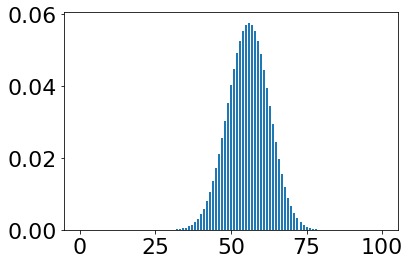

In [7]:
N = 101
hypothesis = range(0, N)
data_0 = [TAILS] * 22
data_1 = [HEADS] * 28
data = data_0 + data_1

# initialize prior
prior = initPriors(hypothesis)

for d in data:
    prior = update(hypothesis, prior, d)

# plotting code
width = 1/1.5
plt.bar(hypothesis, prior, width)
fig = plt.gcf()

# find the dataset mean
mean = 0
for i in range(0, len(prior)):
    mean = mean + hypothesis[i] * prior[i]
    
print("Mean", mean)
print(percentile(prior, hypothesis, 2.5),percentile(prior, hypothesis, 97.5))

## The Unfair Coin, Part 2

When flipped a total of 250 times, a one-peso coin came up heads 140 times and tails 110 times. Does this data give evidence that the coin is more biased towards heads than tails?

Mean 55.95238095238095
50 62


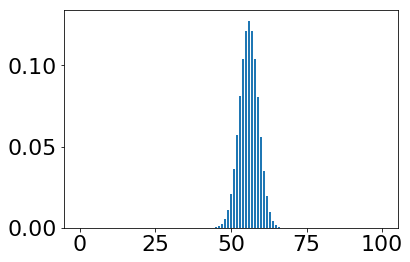

In [8]:
N = 101
hypothesis = range(0, N)
data_0 = [TAILS] * 110
data_1 = [HEADS] * 140
data = data_0 + data_1

# initialize prior
prior = initPriors(hypothesis)

for d in data:
    prior = update(hypothesis, prior, d)

# plotting code
width = 1/1.5
plt.bar(hypothesis, prior, width)
fig = plt.gcf()

# find the dataset mean
mean = 0
for i in range(0, len(prior)):
    mean = mean + hypothesis[i] * prior[i]
    
print("Mean", mean)
print(percentile(prior, hypothesis, 2.5),percentile(prior, hypothesis, 97.5))

## The Unfair Coin and Better Priors

What if we made our priors to prefer the 50% area?

In [9]:
def initPriors2(hypothesis):
    N = len(hypothesis) - 1
    priors = []
    
    for h in hypothesis:
        if(h < 50):
            priors.append(h/100)
        else:
            priors.append((100-h)/100)
        
    return priors

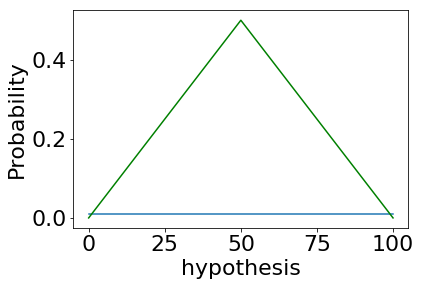

In [10]:
N = 101
hypothesis = range(0, N)
data_0 = [TAILS] * 50
data_1 = [HEADS] * 50
data = data_0 + data_1

# initialize prior
prior = initPriors(hypothesis)
prior2 = initPriors2(hypothesis)

# plotting code
plt.plot(prior)
plt.plot(prior2, color = 'g')
plt.xlabel('hypothesis')
plt.ylabel('Probability')
plt.show()

Mean 50.000000000000014
2 98


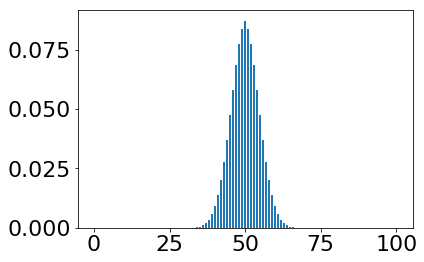

In [11]:
for d in data:
    prior2 = update(hypothesis, prior2, d)

# plotting code
width = 1/1.5
plt.bar(hypothesis, prior2, width)
fig = plt.gcf()

# find the dataset mean
mean = 0
for i in range(0, len(prior)):
    mean = mean + hypothesis[i] * prior[i]
    
print("Mean", mean)
print(percentile(prior, hypothesis, 2.5),percentile(prior, hypothesis, 97.5))

## The Unfair Coin and the Unreliable Observer
Suppose that instead of observing coin tosses directly, you measure the outcome using an instrument that is not always correct. Specifically, suppose there is a probability y that an actual heads is reported as tails, or actual tails reported
as heads. Write a class that estimates the bias of a coin given a series of outcomes and the value of y.

How does the spread of the posterior distribution depend on y?

Mean 18.628023687626833
8 29


18.628023687626833

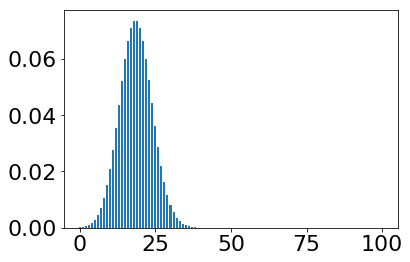

In [12]:
def likelihoodWithBias(data, hypothesis, y):
    pDH = []
    for h in hypothesis:
        if(data == HEADS):
            pDH.append((h/100*(1-y)) + ((1-h/100)*y))
        else:
            pDH.append((1-h/100)*(1-y) + ((h/100)*y))
    return pDH

def updateWithBias(hypo, prior, data, y):
    # for each hypothesis, calculate P(H) * P(D|H), or the prior times the likelihood
    
    # get pHpDH
    pHpDH = []
    pDH = likelihoodWithBias(data, hypo, y)
    pSum = 0
    for i in range(0,len(hypo)):
        pHpDH.append(prior[i] * pDH[i])
        pSum = pSum + pHpDH[i]
        
    posterior = []
    for i in range(0,len(hypo)):
        if(pSum == 0):
            posterior.append(0)
        else:
            posterior.append(pHpDH[i]/pSum)
        
    return posterior

def getBias(hypothesis, data, y):
    
    # initialize prior
    prior = initPriors(hypothesis)
#     prior2 = initPriors2(hypothesis)

    for d in data:
        prior = updateWithBias(hypothesis, prior, d, y)

    # plotting code
    width = 1/1.5
    plt.bar(hypothesis, prior, width)
    fig = plt.gcf()

    # find the dataset mean
    mean = 0
    for i in range(0, len(prior)):
        mean = mean + hypothesis[i] * prior[i]

    print("Mean", mean)
    print(percentile(prior, hypothesis, 2.5),percentile(prior, hypothesis, 97.5))
    
    return mean

N = 101
numFlips = 500
b = 0.37
hypothesis = range(0, N)
data = np.random.choice(2,numFlips,p=[1-b, b])
y = 0.3

for d in data:
    x = np.random.randint(0,100)
    if(x < y):
        if(d == HEADS):
            d = TAILS
        else:
            d = HEADS

getBias(hypothesis, data, y)


## Rolling the Gacha

The mobile game Granblue Fantasy is a popular gacha-game in Japan. The gacha has three rarities, Common, Uncommon, and Rare, with different individual rates, with each rarity being progressively lower than the last.

A certain player has just started playing and rolled the gacha 50 times. The gacha gave him four characters of the highest rarity. Give an interval estimate for the probability to roll a character of the highest rarity.

## More Rolls, More Data

A year later, our player is now an avid player of the game, and has rolled the gacha 500 times. He was able to roll 27 characters of the highest rarity. Does this change the probability we have? How?

## Developer Information, Update the Priors

What if we had ‘better’ priors? The game developers announced the probability of rolling the highest rarity at 6%.

How do we construct our priors?
What does this do to our estimation for 50 rolls and 500 rolls?


## A Wall of Slot Machines

Suppose you are faced with N slot machines, each with an unknown probability of distributing a prize. Some slot machines are generous, others are not so. You can only play one slot machine at once, devise a strategy to maximize your winnings.